# Keras Tutorial for Beginners - 1. Neural Networks


<a href=#1>1. Why Neural Networks?</a>  
<a href=#2>2. Design of Neural Network</a>  
<li><a href=#2.1>2.1. Perceptron</a>   </li>
<li><a href=#2.2>2.2. Multi-Layer perceptron = Neural Network</a>   </li>
<li><a href=#2.3>2.3. Activation Function</a>   </li>
<li><a href=#2.4>2.4. Loss Function</a>   </li>
<li><a href=#2.5>2.5. Optimizer</a>   </li>
<a href=#3>3. Neural Network with Python/Keras</a>  
<li><a href=#3.1>3.1. Load Data</a>  </li>
<li><a href=#3.2>3.2. Preprocessing</a>  </li>
<li><a href=#3.3>3.3. Design a NN</a>  </li>
<li><a href=#3.4>3.4. Compile model</a>  </li>
<li><a href=#3.5>3.5. train model</a>  </li>
<li><a href=#3.6>3.6. Analyze results</a>  </li>


## 1. Why Neural Networks? <a name='1' />

Neural Networks (NNs) are designed to solve a complicated problem, motivated by the design of a human's brain, but not really related to biological functions. A NN enables us to train a model by feeding it input parameters/features and utilizing hidden layers with weights that are adjusted in the training process. NNs are really powerful tools to solve complex, non-linear real-world problems.

NNs can use many hidden layers, which save results of combinations of weighted-features from the previous layer (or input values), or some normalization functions called activation functions. Activation functions serve a valuable purpose of preventing the model from being just a combination of linear regressions.

<img src="./images/nn.jpeg" style="width: 500px;"/>
<img src="./images/nn.jpeg" width="500">
<center><font color='gray'>Image from [here](https://becominghuman.ai/artificial-neuron-networks-basics-introduction-to-neural-networks-3082f1dcca8c)</font> </center>


This tutorial will help you how to use Keras to train a NN model. There are several different popular other packages, but Keras is open source neural network library and user-friendly and very easy to learn. Very simple, not difficult at all. Let's start!

## 2. Design of Neural Network <a name='2' />

The figure below is an example of design of NN.

<img src="./images/nn.6.jpg">

It looks pretty complicated, huh? I want to discuss about "perceptron" first. It will be helpful!

### 2.1. Perceptron <a name='2.1' />
<img src="./images/perceptron.png" style="width: 450px;"/>

A perceptron is a single layer neural network, while a multi-layer perceptron is called Neural Network.

How does it work?
All input features have associated weights and are summed together. Then an activation function is applied. One such activation function is the step function, which results in either a zero or a one, depending on whether the summation is above the threshold activation value or not. Perceptrons are usually used to classify data into two parts. Therefore, it is also known as a Linear Binary Classifier.


### 2.2. Multi-Layer perceptron = Neural Network <a name='2.2' />
If so, what are Neural Networks? As mentioned previously, it is multi-layer perceptron.

<img src="./images/nn.gif" style="width: 700px">

Designing the model is an important first step to training a NN. We can use one or two hidden layers with different numbers of nodes, or a lot of hidden layers, for example. Let me explain the example above. There are two hidden layers ("hidden layers" are layers between input layers and the output) with multiple neurons. Each neuron is a weighted sum of the previous nodes. An activation function is used at each node to decide whether it will be activated from the weighted sum of the previous nodes feeding it. 


### 2.3. Activation Function <a name='2.3' />

I previously introduced the step function as an activation function, but NNs commonly use some other activation functions, such as the sigmoid function and the reLu function. 
The activation function h(a) can be denoted as follows:

<p>
<center> $a$= $w_1$ $x_1$ + $w_2$ $x_2$ + $w_3$ $x_3$+ .... $w_8$ $x_8$ + $w_9$ $x_9$ + $w_{10}$ $x_{10}$ </center> 
<center> $y$ = $h(a)$ </center>

The plots below show the different types of activation functions normally used. Note that activation functions should be non-linear, because otherwise it would produce a NN that is a linear regression.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

x=np.linspace(-4,4,100)
fun = {'sigmoid':[1 / (1 + math.exp(-i)) for i in x],
      'tanh':np.tanh(x),
      'ReLu':np.maximum(0, x)}
name = ['sigmoid','tanh','ReLu']

plt.figure(figsize=(12,3))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(x,fun[name[i]],label=name[i])
    plt.grid()
    plt.title(name[i])

You can read [this medium post](https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0) to understand activation functions in greater detail.

### 2.4. Loss Function  <a name='2.4' />

This loss function returns a numerical value that is lower if the model predicts the true label, and higher if it gets the wrong answer. As with other classification tasks in machine learning, we want to minimize the loss function to train our model to give us the highest accuracy possible. Let's assume that we have 4 labels in our data. The true labels are one-hot encoded, and each label is a vector with 4 entries. The model outputs a vector having 4 entries, where each entry corresponds to the probability of that label.

<img src="./images/skier_awesome.png" style="width: 550px;">

<center><font color='gray'> Illustration of error/loss function.</font></center>
<center><font color='gray'> The goal is to minimize the error by seeking parameters (weights) that minimize the loss function. </font></center>
  <center><font color='gray'>   (Source: modified from Udacity Machine Learning Nano Degree image) </font></center>

There are several different loss functions, but cross entropy is one of the most popular loss functions for classification models. Here, I want to focus on explaining cross entropy function. If we train regression models, we can alternatively use mean square error (mse) or mean absolute error (mae) as a loss function. [Here](https://isaacchanghau.github.io/post/loss_functions/) is a good reference to learn more about loss functions.

### categorical cross entropy

As previously stated, cross entropy is commonly used for classification models. In the case of multi-classification, categorical cross entropy is used while binary cross entropy is used for binary classification. 

<img src="./images/logloss.png" style="width: 300px;">

where M is the number of classifiers and N is the number of observations. $y_{ij}$ gives the known label between observation $i$ and label $j$ (0 or 1). $p_{ij}$ is the prediction of observation $i$ being label $j$. The plot below shows the shape of log-loss function when the label is 1.

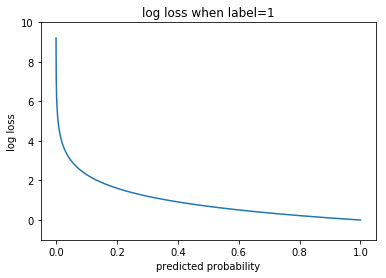

In [2]:
x=np.linspace(0.0001,1,10000)
plt.plot(x,-np.log(x))
plt.title('log loss when label=1')
plt.ylabel('log loss')
plt.xlabel('predicted probability')
plt.ylim(-1,10);

We can see very high log loss for the low predicted probability (especially below 0.1).

Let's look at a specific example. Below I show an example of images that have been classified as either Human, Dog, Cat, or Bird, and the resulting log-loss printed at the bottom. Note that Tom Cruise is not a cat, even though the classifier thinks he looks like one.
<img src="./images/loss.001.jpeg" style="width: 650px;">

Let's imagine that the classifier predictions above for human, dog, cat, and bird were made after the first epoch of training. We calculate the log-loss value following the equation above, and obtain a value of 0.67. 

<img src="./images/loss.002.jpeg" style="width: 650px;">

Our model then adjusts the weights for the second epoch, and if the predictions change to favor the true labels more, then the loss function decreases. Let's imagine that we have a second epoch with results given above (right). In this case, the log loss is 0.35, which is much better than the previous one. Eventually, if our model is good enough, we would find at the end of our training that it correctly labels most images.

### 2.5. Optimizer <a name='2.5' />

The last part I want to discuss is the optimizer. A NN seeks the best parameters (weights) to minimize the loss function. A number of algorithms can be used to adjust the weights and bring them closer to the ideal values (the parameters that minimize the loss function), and these algorithms are called "optimizers".

The simplest form of optimizer is Stochastic Gradient Descent (SGD), which is to change the parameters along the negative of the gradient direction. Recall that the gradient is the partial derivative, and the gradient tells you the direction of increasing slope. Therefore, each step of gradient descent will subtract the gradient from each weight, which moves the weights towards a lower loss function, overall.

However, this algorithm is slow to converge to a solution and can sometimes get stuck in a local minimum that causes it to miss a global minimum. So, there are several other optimizers, such as AdaGrad, RMSprop, and Adam, that have been found to be more successful. You can read [these awesome lecture notes](http://cs231n.github.io/neural-networks-3/#update) to find out more.


<img src="./images/opt1.gif" align="left" style="width: 380px;">
<img src="./images/opt2.gif" align="right" style="width: 380px;">

<center><font color='gray'>Animation from [here](http://cs231n.github.io/neural-networks-3/#update) (image credit: Alec Radford.)</font></center>

Note above the slowness of SGD at convergence compared to the other methods.

## 3. Neural Network with Python/Keras <a name='3' />

All right. Here, I want to show a working example with Python/Keras. We will use the following simple steps to train a NN with Keras.

- (1) Load Data
- (2) Preprocessing
- (3) Design a model
- (4) Compile model
- (5) Train model
- (6) Analyze results

### 3.1. Load Data <a name='3.1' />

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems ([Wikipedia](https://en.wikipedia.org/wiki/MNIST_database)). Keras provides some datasets, like MNIST, for easy testing. We can easily load data using keras.datasets. [Here](https://keras.io/datasets/) is a list of datasets Keras provides. 

Let's load the MNIST dataset of hand-written numbers from 0-9.


```python
from keras.datasets import mnist

(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
num_input_nodes = 28 * 28
num_classes = 10
```

<img src="./images/mnist_ex.png" style="width: 650px;">
Examples of MNIST images

### 3.2. Preprocessing <a name='3.2' />

The input dataset consists of 60,000 images, each of them 28$\times$28 pixels. However, a regular NN isn't designed to handle 2D image data, and so we must pre-process the images by reshaping them into single-column vectors. To pre-process the images, I'll use a Keras utility called np_utils. I also use the to_categorical method to create a matrix with dummy variables for the 10 classes.
``` python
# reshape images to column vectors
train_features = train_features.reshape(train_features.shape[0], 28*28)
test_features = test_features.reshape(test_features.shape[0], 28*28)

# convert class labels to binary class labels
from keras.utils import np_utils

train_y = np_utils.to_categorical(train_labels, num_classes)
test_y = np_utils.to_categorical(test_labels, num_classes)
```

<img src="./images/0_ex.jpeg" style="width: 550px;">

### 3.3. Design a NN <a name='3.3' />

``` python
from keras.models import Sequential
from keras.layers.core import Dense, Activation

def create_model():
    ## model start!
    model = Sequential()
    ## first hidden layer
    model.add(Dense(100, input_dim = num_input_nodes))
    model.add(Activation('relu'))
    ## second hidden layer
    model.add(Dense(100))
    model.add(Activation('relu'))
    ## third hidden layer (number of nodes should be same to the number of classifier)
    model.add(Dense(num_classes))
    model.add(Activation('sigmoid'))
    return model
```

- Sequential() : a linear stack of layers. We can initialize the NN with a Sequential model.   
- Dense() : a regular NN layer, which has densely-connected nodes (in our case, we use 100 nodes here).   
- Activation() : an activation function. We can specify a number of activation functions that we've previously discussed, including sigmoid, ReLU, softmax, etc. The model usually includes many activation functions. 

The final step is adding Dense() layer with nodes equal to the number of classes, and an activation function to derive each probability.

<img src="./images/model.001.jpeg" style="width: 850px;">


The number of parameters listed in the right columns shows the number of independent weights that must be determined in the training of the model. The first dense layer, because it has fully-connected nodes, will have (28[width] $\times$ 28[height] + 1 [bias])$\times$ 100 weights. The next layer has (100 + 1[bias])$\times$100 weights. And the last (output) layer consists of (100 + 1 [bias])$\times$10 weights. That brings the total number of parameters in our model up to nearly 90,000, despite only having two simple layers. You can see how these NNs could become very difficult to train on most people's personal computer.


### 3.4. Compile model <a name='3.4' />

Next step is to configure the model for training with optimizer, loss function, and metrics. When initializing the optimizer, we can specify the learning rate (lr) which sets the relative size of the changes in weights with each training step. A larger learning rate might help you reach convergence faster, but if it is too large, you might fail to find the best minimum loss function. Conversely, if the learning rate is too small, it will fail to converge fast enough. You can check the default learning rate for different Keras optimizers [here](https://keras.io/optimizers/).

``` python
from keras.optimizers import *

model = create_model()
## choose an optimizer. Here, I will choose Adam with learning rate=0.005
#opt = SGD(lr=0.005)
#opt = RMSprop(lr=0.005)
opt = Adam(lr=0.005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
```


### 3.5. train model <a name='3.5' />

Finally, we are ready to train the model, specifying a batch size of 64, 20 epochs, and a validation split of 20%. You can adjust batch size and number of epochs: higher batch size or lots of epochs might take longer time.
```python
model_info  = model.fit(train_features, train_labels, batch_size=64, \
                       epochs=50, verbose=2, validation_split=0.2)
```

That's it! The code below includes all of the steps we have covered so far. You can run the cell below.

In [3]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import *

## 1. Load Data
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
num_input_nodes = 28 * 28
num_classes = 10

## 2. Preprocessing
train_features = train_features.reshape(train_features.shape[0], 28*28)
test_features = test_features.reshape(test_features.shape[0], 28*28)

train_y = np_utils.to_categorical(train_labels, num_classes)
test_y = np_utils.to_categorical(test_labels, num_classes)
  
## 3. Design a model
model = Sequential()
model.add(Dense(100, input_dim = num_input_nodes))
model.add(Activation('sigmoid'))
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

## 4. Compile model
#opt = SGD(lr=0.005)
#opt = RMSprop(lr=0.005)
opt = Adam(lr=0.005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

## 5. Train model
batch_size=64; epoch=30
model_info  = model.fit(train_features, train_y, batch_size=batch_size, \
                   epochs=epoch, verbose=2, validation_split=0.2)

/Users/ryan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 48000 samples, validate on 12000 samples
Epoch 1/30
 - 2s - loss: 0.7671 - acc: 0.7561 - val_loss: 0.5861 - val_acc: 0.8183
Epoch 2/30
 - 2s - loss: 0.5968 - acc: 0.8064 - val_loss: 0.5491 - val_acc: 0.8173
Epoch 3/30
 - 2s - loss: 0.5226 - acc: 0.8281 - val_loss: 0.4385 - val_acc: 0.8604
Epoch 4/30
 - 2s - loss: 0.4990 - acc: 0.8377 - val_loss: 0.4364 - val_acc: 0.8568
Epoch 5/30
 - 2s - loss: 0.4583 - acc: 0.8507 - val_loss: 0.3899 - val_acc: 0.8789
Epoch 6/30
 - 3s - loss: 0.4599 - acc: 0.8504 - val_loss: 0.4517 - val_acc: 0.8545
Epoch 7/30
 - 2s - loss: 0.4335 - acc: 0.8594 - val_loss: 0.4522 - val_acc: 0.8465
Epoch 8/30
 - 2s - loss: 0.4441 - acc: 0.8540 - val_loss: 0.4141 - val_acc: 0.8679
Epoch 9/30
 - 2s - loss: 0.4003 - acc: 0.8692 - val_loss: 0.3541 - val_acc: 0.8854
Epoch 10/30
 - 2s - loss: 0.3681 - acc: 0.8795 - val_loss: 0.3196 - val_acc: 0.8993
Epoch 11/30
 - 2s - loss: 0.3402 - acc: 0.8893 - val_loss: 0.3311 - val_acc: 0.8934
Epoch 12/30
 - 2s - loss: 0.3582 - 

### 3.6. Analyze results  <a name='3.6' />

### (1) plot learning curves

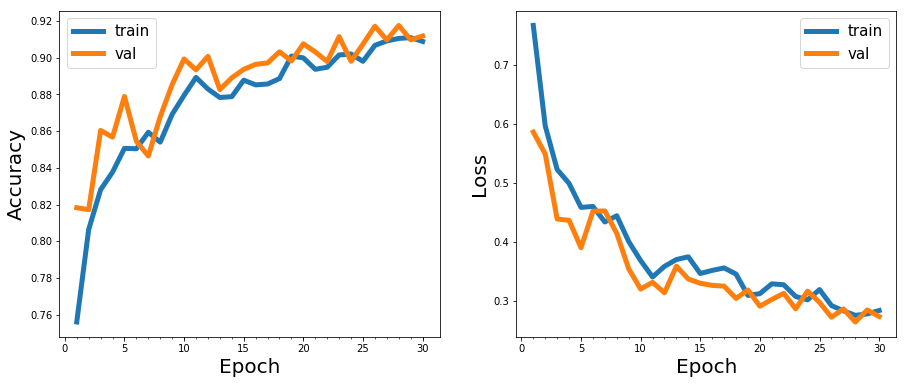

In [4]:
## plot a result
n = len(model_info.history['acc'])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)

ax1.plot(range(1,n+1),model_info.history['acc'],linewidth=5)
ax1.plot(range(1,n+1),model_info.history['val_acc'],linewidth=5)
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
ax1.set_xticks(np.arange(1,n+1),n/10)
ax1.legend(['train', 'val'], loc='best',fontsize=15)

ax2 = fig.add_subplot(122)
ax2.plot(range(1,n+1),model_info.history['loss'],linewidth=5)
ax2.plot(range(1,n+1),model_info.history['val_loss'],linewidth=5)
plt.ylabel('Loss',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
ax2.set_xticks(np.arange(1,n+1),n/10)
ax2.legend(['train', 'val'], loc='best',fontsize=15)
plt.show()

The learning curves above show how much the accuracy (left) increased for the training and validation set as the number of epochs of training increased, and how much the log-loss value (right) decreased over the same set of epochs. Note that the difference between accuracies of training and validation sets can tell you whether you are overfitting (if you have much higher accuracy for your training set). Also note that both learning curves flatten out and don't significantly change over the last five epochs or so. This means that our NN has pretty much converged. If you examine the learning curves from your NN, and you don't see this sign of convergence, then you want to consider re-training your NN using more epochs.

In [5]:
predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0)))
             for feature in test_features]
true_class = np.argmax(test_y, axis=1)
num_correct = np.sum(predictions == true_class) 
accuracy = float(num_correct)/test_features.shape[0]
print('Accuracy with test dataset : ' + str(accuracy))

Accuracy with test dataset : 0.9082


Not bad, huh?

### (2) confusion matrix

A helpful way to assess the performance of a classification model is to check the confusion matrix. In our case, the confusion matrix has 10 rows and 10 columns (the rows being true labels and the columns being predicted labels), where each cell denotes the number of test samples that belong to that pair. If our classifier is perfect, all samples will be on the diagonal.

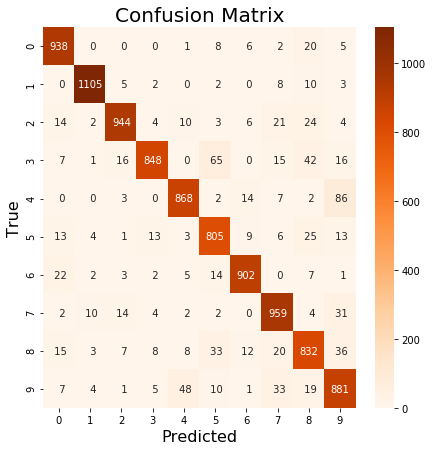

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
import seaborn as sns
confusion = confusion_matrix(test_labels,predictions)
## Plot Confusion Matrix
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax = sns.heatmap(confusion, ax=ax, cmap=plt.cm.Oranges, annot=True,fmt='3d')
#    ax.set_xticklabels(range(10))
#    ax.set_yticklabels(range(10))
plt.title('Confusion Matrix',size=20)
plt.ylabel('True',size=16)
plt.xlabel('Predicted',size=16);

Done! I hope you have found this tutorial helpful, and you get to work making your own NNs to solve all kinds of problems. Good Luck! In the next tutorial, we will tackle Convolutional Neural Networks (CNNs), which are more helpful to classify image data.